In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
# I/O
df = pd.read_csv('data/the_office_series.csv', index_col=0)  # let's get back to this file later
df = pd.read_csv('data/the-office_lines.csv', index_col=0)

In [5]:
# Show the data
df

,Character,Line,Season,Episode_Number
0,Michael,All right Jim. Your quarterlies look very goo...,1,1
1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1
2,Michael,So you’ve come to the master for guidance? Is...,1,1
3,Jim,"Actually, you called me in here, but yeah.",1,1
4,Michael,"All right. Well, let me show you how it’s don...",1,1
...,...,...,...,...
61302,Creed,It all seems so very arbitrary. I applied for...,9,23
61303,Meredith,I just feel lucky that I got a chance to shar...,9,23
61304,Phyllis,I’m happy that this was all filmed so I can r...,9,23
61305,Jim,I sold paper at this company for 12 years. My...,9,23


In [6]:
# Data quality
print(f'There are {df.isna().sum().sum()} NaN values')

There are 0 NaN values


In [7]:
# Show most frequent lines
df['Line'].value_counts(ascending=False).head(10)

 Yeah.      254
 What?      213
 No.        195
 Okay.      163
 Yes.       155
 Yeah.      138
 Okay.      109
 Hey.       105
 What?       96
 No.         93
Name: Line, dtype: int64

In [8]:
# We see some weird behavior - Yeah is in there a couple times with spaces before and after and with/without punctuation.
df['Line'].value_counts(ascending=False).head(10).index

Index([' Yeah.', ' What?', ' No.', ' Okay.', ' Yes.', ' Yeah.  ', ' Okay.  ',
       ' Hey.', ' What?  ', ' No.  '],
      dtype='object')

In [9]:
# Let's do some rough cleaning
# 1) put everything to lower case
# 2) remove special characters like .,?!
# 3) remove spaces at the beginning & end of each line, and remove double spaces
# But before removing - let's count the occurrences of each of those items to remove

In [10]:
# 1) Lower case everything
df['line'] = df['Line'].str.lower()

In [11]:
special_characters = ['.', ',', '!', '\?', '  ']  
# '.'is any character except line break in regex expresion 
# need to escape the question mark since it's also an operator for if-else oneliners
for char in special_characters:
    n = df['line'].str.contains(char, regex=False).sum()
    print(f'{n:5} / {len(df)} ({n/len(df)*100:5.1f}%) of lines contain the following special character which will be removed: {char if char != "  " else "(double space)"}')

43746 / 58721 ( 74.5%) of lines contain the following special character which will be removed: .
25410 / 58721 ( 43.3%) of lines contain the following special character which will be removed: ,
 6811 / 58721 ( 11.6%) of lines contain the following special character which will be removed: !
    0 / 58721 (  0.0%) of lines contain the following special character which will be removed: \?
27329 / 58721 ( 46.5%) of lines contain the following special character which will be removed: (double space)


In [12]:
df['line'] = df['line'].map(lambda x: re.sub(r'\W+', ' ', x))

In [13]:
# Let's check again
for char in special_characters:
    n = df['line'].str.contains(char, regex=False).sum()
    print(f'{n:5} / {len(df)} ({n/len(df)*100:5.1f}%) of lines contain the following special character which will be removed: {char if char != "  " else "(double space)"}')

    0 / 58721 (  0.0%) of lines contain the following special character which will be removed: .
    0 / 58721 (  0.0%) of lines contain the following special character which will be removed: ,
    0 / 58721 (  0.0%) of lines contain the following special character which will be removed: !
    0 / 58721 (  0.0%) of lines contain the following special character which will be removed: \?
    0 / 58721 (  0.0%) of lines contain the following special character which will be removed: (double space)


In [16]:
# Looks good now. Let's check most frequent lines again :) 

In [17]:
df['line'].value_counts(ascending=False).head(10)

 yeah          625
 no            402
 what          397
 okay          383
 yes           352
 hey           241
 oh            204
 thank you     173
 ok            160
 really        139
Name: line, dtype: int64

In [18]:
# Also looks good
# Let's see how many different lines we have
print(f'{df["line"].nunique()} of {len(df)} lines (i.e., {df["line"].nunique()/len(df)*100:.1f}%) are unique')

49984 of 58721 lines (i.e., 85.1%) are unique


In [19]:
# Let's see who talks the most lines
df['Character'].value_counts(ascending=False)

Michael                    11806
Dwight                      7393
Jim                         6666
Pam                         5264
Andy                        3933
                           ...  
Dale                           1
(Pam’S Mom) Heleen             1
Dwight, Jim And Michael        1
Teddy Wallace                  1
Carol Stills                   1
Name: Character, Length: 780, dtype: int64

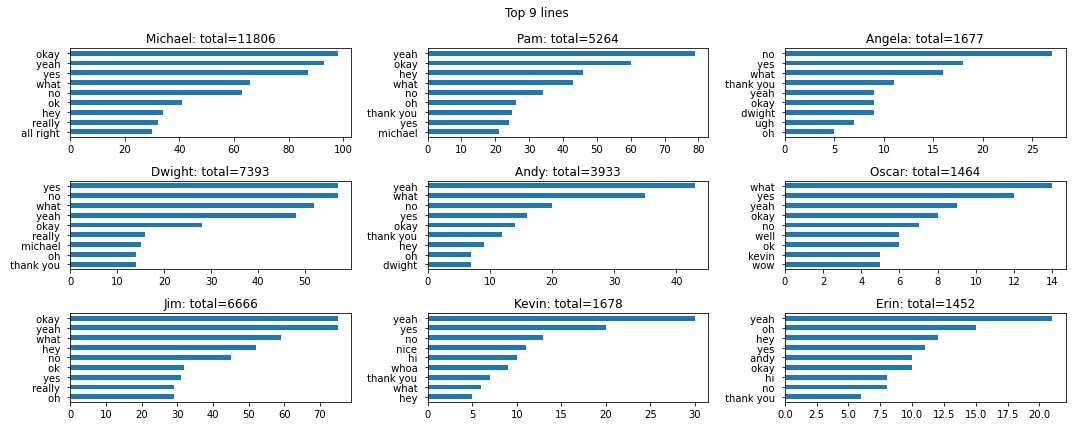

In [20]:
# For the top M characters - print their top N words
M, N=9, 9
topM_characters = df['Character'].value_counts(ascending=False).head(M).index.tolist()

# Plotting
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15,6))
row, col = 0, 0

for i, character in enumerate(topM_characters):
    topN_lines = df[df['Character']==character]['line'].value_counts(ascending=False).head(N)

    # Plotting
    row = i%3
    col = i//3
    axis = ax[row, col]
    axis.set_title(character + f': total={len(df[df["Character"]==character])}')
    topN_lines.sort_values().plot.barh(ax=axis)

plt.suptitle(f'Top {N} lines')
plt.tight_layout()

In [21]:
# Most of these words are stopwords - let's remove them
print(sorted(stopwords.words('english')))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [24]:
# define function to remove stopwords
# however, not sure we should do that: one of mike's most famous lines is "that's what she said" -> this would be reduced to: "said"
stopws = stopwords.words('english')
stopws += ['yes', 'okay', 'yeah', 'right', 'hey', 'oh']
def remove_stopwords(x):
    line = word_tokenize(x)
    line = [x for x in line if x not in stopws]
    return " ".join(line)

# example usage
print(df['line'][0])
remove_stopwords(df['line'][0])

 all right jim your quarterlies look very good how are things at the library 


'jim quarterlies look good things library'

In [25]:
# Let's remove all the stopwords
df['line_nosw'] = df['line'].apply(remove_stopwords)

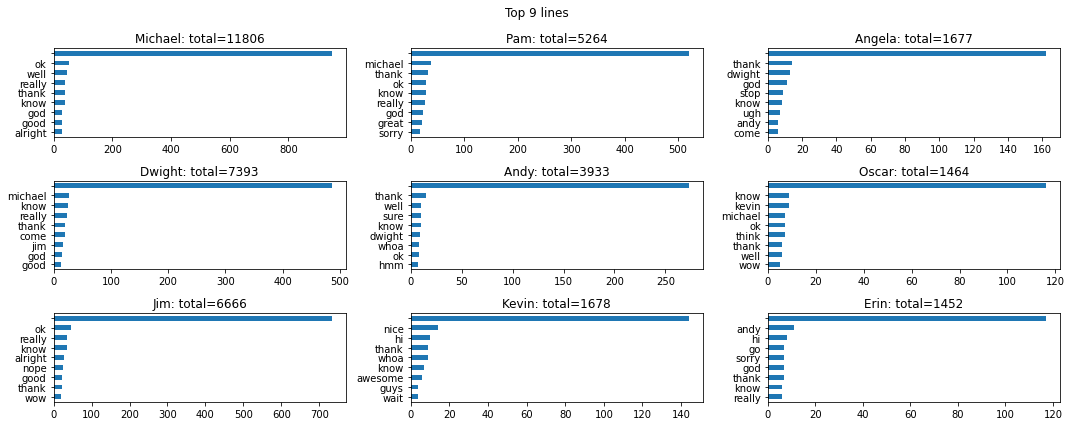

In [26]:
# For the top M characters - print their top N words
M, N=9, 9
topM_characters = df['Character'].value_counts(ascending=False).head(M).index.tolist()

# Plotting
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15,6))
row, col = 0, 0

for i, character in enumerate(topM_characters):
    topN_lines = df[df['Character']==character]['line_nosw'].value_counts(ascending=False).head(N)

    # Plotting
    row = i%3
    col = i//3
    axis = ax[row, col]
    axis.set_title(character + f': total={len(df[df["Character"]==character])}')
    topN_lines.sort_values().plot.barh(ax=axis)

plt.suptitle(f'Top {N} lines')
plt.tight_layout()

In [27]:
# All the lines that were ONLY stopwords are now empty

# TF-IDF
$ \text{TF-IDF}_{Michael}(line_i) = \frac{count(character = michael | line=line_i)}{count(characters | line=line_i)}$

In [130]:
# Which lines are most characteristic for michael? - let's see with TF-IDF
# TF-IDF =: # of times michael uses a line / # of artists that use this line at least once

character = 'Michael'
lines = 'line_nosw'

counts = df[df['Character'] == character][lines].value_counts()
df_n = df.groupby(lines)['Character'].nunique().sort_values(ascending=False)

michael_lines = []
i = 0
for line, count in zip(counts.index, counts.values):
    if line == '':
        pass
    else:
        n_characters = df_n.loc[line]
        tf_idf = count/n_characters
        michael_lines.append((line, count, n_characters, tf_idf))
        i+=1
        if i%1000 == 0:
            print(f'line: {line}, count {count}, n_characters: {n_characters}, TF-IDF: {tf_idf:.1f}')
    

line: car michael driving god wow asleep, count 1, n_characters: 1, TF-IDF: 1.0
line: pam would stand sec sits pam chair hmm see relaxed like chair slowly sinking chair offers good support urkelnomically correct good chair think spoiled appreciate things think kids africa chairs sit big piles garbage think copiers chair slowly lowered almost michael visible desk copiers even struggles get pam chair gah even paper spoiled throw perfectly good tiramisu little tiny hair point seen light terms need nothing, count 1, n_characters: 1, TF-IDF: 1.0
line: whole year actually favorite restaurant closed, count 1, n_characters: 1, TF-IDF: 1.0
line: fantastic good good enough keep working pam international sales consultant, count 1, n_characters: 1, TF-IDF: 1.0
line: ok could someone come get please ryan, count 1, n_characters: 1, TF-IDF: 1.0
line: uh well honestly ed really wan na, count 1, n_characters: 1, TF-IDF: 1.0
line: theory need cross dot alright going office anybody needs puts dwight head

In [121]:
df_michael_tfidf = pd.DataFrame(michael_lines, columns = ['line', 'count', 'n_others', 'tfidf'])

In [122]:
df_michael_tfidf.sort_values(by='tfidf', ascending=False).head(50)

,line,count,n_others,tfidf
57,electric city scranton,6,1,6.00
85,ok alright,4,1,4.00
107,singing dundies,3,1,3.00
118,call scranton,3,1,3.00
71,da na na na na,5,2,2.50
1,well,46,20,2.30
35,know know,9,4,2.25
294,know know know,2,1,2.00
238,stop talking,2,1,2.00
147,carol,2,1,2.00


In [108]:
df.groupby('line_nosw')['Character'].nunique().sort_values(ascending=False)

line_nosw
                          226
thank                      51
know                       50
ok                         44
sure                       43
                         ... 
hi must andy                1
hi must marcy               1
hi name town                1
hi nard dog lu peachem      1
zoning                      1
Name: Character, Length: 44366, dtype: int64

In [131]:
# Which lines are most characteristic for michael? - let's see with TF-IDF
# TF-IDF =: # of times michael uses a line / # of artists that use this line at least once

character = 'Michael'
lines = 'line'

counts = df[df['Character'] == character][lines].value_counts()
df_n = df.groupby(lines)['Character'].nunique().sort_values(ascending=False)

michael_lines = []
i = 0
for line, count in zip(counts.index, counts.values):
    if line == '':
        pass
    else:
        n_characters = df_n.loc[line]
        tf_idf = count/n_characters
        michael_lines.append((line, count, n_characters, tf_idf))
        i+=1
        if i%1000 == 0:
            print(f'line: {line}, count {count}, n_characters: {n_characters}, TF-IDF: {tf_idf:.1f}')

line:  there s gonna be a free room , count 1, n_characters: 1, TF-IDF: 1.0
line:  i think i do , count 1, n_characters: 2, TF-IDF: 0.5
line:  imitating her accent well i never thought i d see your face around these parts you old bastard , count 1, n_characters: 1, TF-IDF: 1.0
line:  oh yes yes yes yes just so you know he s at his funniest when you ve given him five shots , count 1, n_characters: 1, TF-IDF: 1.0
line:  okay well i am just glad this is all over , count 1, n_characters: 1, TF-IDF: 1.0
line:  i m not a master bee , count 1, n_characters: 1, TF-IDF: 1.0
line:  what s the um saying once their laughing they re that s once they re laughing that s 50 percent of them being horizontal so not that i m just not that that s my that s what i m trying to do but i think it helps kind of melts the ice breaks the ice melts breaks the ice and melts them melts their hearts , count 1, n_characters: 1, TF-IDF: 1.0
line:  oh thanks thanks it s very cool it s a three bedroom gay friendly , cou

In [169]:
df_michael_tfidf = pd.DataFrame(michael_lines, columns = ['line', 'count', 'n_others', 'tfidf'])
df_michael_tfidf.sort_values(by='count', ascending=False).head(50)

,line,count,n_others,tfidf
0,okay,98,52,1.884615
1,yeah,93,77,1.207792
2,yes,87,47,1.851064
3,what,66,49,1.346939
4,no,63,60,1.050000
5,ok,41,37,1.108108
6,hey,34,40,0.850000
7,really,32,27,1.185185
8,all right,30,29,1.034483
9,oh,29,42,0.690476


In [134]:
x = [x for x in df['line'].values.tolist() if 'she said' in x]

In [135]:
x

[' that s what she said pam ',
 ' does that include that s what she said ',
 ' that s what she said ',
 ' a that s what she said and b i wanted it to be impressive the biggest day of the year deserves the biggest tree of the year ',
 ' it was supposed to be for meredith cause she said she likes my drawings ',
 ' that s what she said ',
 ' uh that s what she said see haven t lost my sense of humor no no need it was a non stick grill ',
 ' she said lots of things ',
 ' that s what she said ',
 ' that s what she said jim mouths these words along with michael the thing is angela you are in here an awful lot you have complained about everybody in the office except dwight which is odd because everyone else has had run ins with dwight toby by the way what does redacted mean there is a file full of complaints in here marked redacted ',
 ' i am glad that today spurred social change that s part of my job as regional manager but you know what even if it didn t at least we put this matter to bed t

In [163]:
df_tf = df[['line', 'Character']]
df_tf['values'] = 1

/var/folders/gl/lf_ddy9561j7lbb3hpj3ks2w0000gn/T/ipykernel_1283/3758815838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tf['values'] = 1


In [184]:
pivot = df_tf.pivot_table(columns='Character', index='line', values='values', aggfunc='count').fillna(0)

In [185]:
pivot['Michael'].sort_values(ascending=False)

line
 okay                                              98.0
 yeah                                              93.0
 yes                                               87.0
 what                                              66.0
 no                                                63.0
                                                   ... 
 it s a set of rubber gaskets for canning jars      0.0
 it s a small office                                0.0
 it s a statement of fact                           0.0
 it s a steve miller tribute band                   0.0
you want to play pool                               0.0
Name: Michael, Length: 49984, dtype: float64

In [254]:
michael_counts = pivot[pivot['Michael'] > 1]['Michael']
normalizer_michael = len(df[df.Character=='Michael']['Line'])
michael_counts /= normalizer_michael / 1e4

In [255]:
other_counts = pivot.loc[michael_counts.index, pivot.columns != 'Michael'].sum(axis=1)
normalizer_other = len(df[df.Character!='Michael']['Line'])
other_counts /= normalizer_other / 1e4

In [256]:
df_counts = pd.DataFrame([michael_counts, other_counts]).T

In [257]:
df_counts = df_counts.rename(columns={"Unnamed 0": "N_others"})

In [258]:
df_counts.head()

,Michael,N_others
line,,
,4.235135,3.410423
500,1.694054,0.213151
about what,1.694054,0.852606
absolutely,1.694054,2.770969
after breakfast,1.694054,0.000000


(0.0, 10.0)

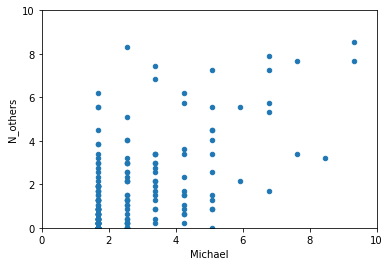

In [260]:
fig, ax = plt.subplots()
df_counts.plot.scatter(x='Michael', y='N_others', ax = ax)
ax.set_xlim([0,10]); ax.set_ylim([0,10])